In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

,s_length,s_width,p_length,p_width,class
28,5.2,3.4,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
140,6.7,3.1,5.6,2.4,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
...,...,...,...,...,...
107,7.3,2.9,6.3,1.8,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
90,5.5,2.6,4.4,1.2,Iris-versicolor


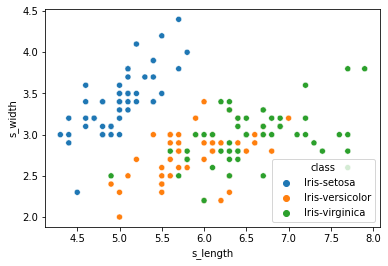

In [2]:
k = 100
df = pd.read_csv('irisdata.csv')
sns.scatterplot(data=df, x='s_length', y='s_width', hue='class')
# select 100 random samples
df_training = df.sample(100)

# select the delta for testing
df_training

In [3]:
def calcDistance(data, p1):
  d = []
  for i in range(len(data)):
    x = data.iloc[i].s_length
    y = data.iloc[i].s_width
    p2 = np.array((x,y))
    #d = np.linalg.norm(p1 - p2)
    dx = np.sqrt(np.sum(np.square(p1 - p2)))
    d.append(dx)
  data['distance'] = d
  return data

def calcKNN(data, knn):
  data.sort_values(by=['distance'], ascending=True, inplace=True)
  data_knn = data.head(knn)
  p = data_knn['class'].value_counts()
  return p

In [4]:
predict_point = np.array((6,2))
df = calcDistance(df, predict_point)
prediction = calcKNN(df, k)
prediction

Iris-versicolor    50
Iris-virginica     40
Iris-setosa        10
Name: class, dtype: int64